# __Name__

алгоритм `K-means` для кластеризації

In [3]:
import os
from pathlib import Path
import random
from typing import Optional

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [4]:
def set_seed(seed_value: int) -> None:
    """Set a random state for repeatability of results."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    # tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = 'true'
    

set_seed(1)

### __`OBTAIN` & `SCRUB`__ + __`EXPLORE`__ (DATASET)

In [5]:
def read_from_csvfile(file: Path, header: Optional[str]='infer') -> pd.DataFrame:
    """Read content from csv-file and return dataframe from content."""
    df = pd.read_csv(file, header=header)
    
    return df

Читаємо всі датасети з файлів `csv` у папці `data2`

In [6]:
dfs = [read_from_csvfile(item, None) for item in Path('data2').iterdir() if item.is_file() and item.suffix.lower() in ('.csv',)]

Виділяємо різні набори

In [7]:
data_2d, mnist = dfs[0], dfs[1]

In [8]:
mnist.shape, data_2d.shape

((500, 785), (200, 3))

In [11]:
data_2d.columns = ['y', 'x1', 'x2']

In [12]:
data_2d.head(3)

,y,x1,x2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430


In [16]:
mnist.columns = ['y'] + [f'x{el}' for el in range(1, mnist.shape[1])]

In [17]:
mnist.head(3)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Перевіримо чи є дублікати для першрго стовпця

In [19]:
not mnist['y'].is_unique, mnist['y'].min(), mnist['y'].max()

(True, 0, 9)

Перша колонка - кластери (позначення), то визначимо скільки значень у кожному:

In [21]:
clusters = {}
[clusters.update({el:1}) if (clusters.get(el) is None) else clusters.update({el:clusters.get(el)+1}) for el in mnist['y']]
clusters

{7: 49, 2: 55, 1: 67, 0: 42, 4: 55, 9: 54, 5: 50, 6: 43, 3: 45, 8: 40}

##### SCRUB & EXPLORE

###### `data_2D`

In [22]:
def draw_2D_scatter(as_x: list, as_y: list, mark: Optional[str], title: str, xlabel: str, ylabel: str, figsize: tuple|None=None) -> None:
    size = figsize or (15, 5)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)
    major_ticks = np.arange(min(as_x), max(as_x)+1, int((max(as_x) - min(as_x)) / len(as_x)) or 1)
    minor_ticks = np.arange(min(as_x), max(as_x)+1, int((max(as_x) - min(as_x)) / len(as_x))/10 or 0.1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    major_ticks_y = np.arange(min(as_y), max(as_y)+1, int((max(as_y) - min(as_y)) / len(as_y)) or 1)
    minor_ticks_y = np.arange(min(as_y), max(as_y)+1, int((max(as_y) - min(as_y)) / len(as_y))/10 or 0.1)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    plt.xticks(rotation=85)
    
    plt.scatter(as_x, as_y, c=mark, cmap='viridis')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax.grid(which='both')
    plt.show()

/tmp/ipykernel_6614/3806943738.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(as_x, as_y, c=mark, cmap='viridis')


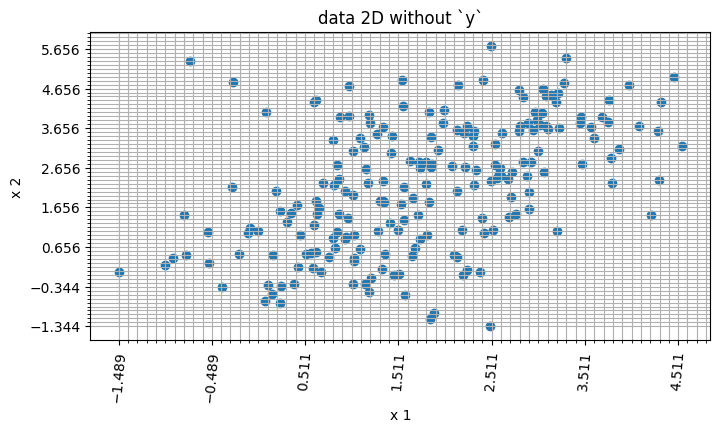

In [23]:
size = (8, 4)
draw_2D_scatter(as_x=data_2d['x1'], as_y=data_2d['x2'], mark=None, title=f'data 2D without `y`', xlabel='x 1', ylabel=f'x 2', figsize=size)

Як бачимо з меж, попередня нормалізація - зайва

###### `mnist`

### __`MODEL`__

###### `data_2D`

###### `mnist`

#### __`Training`__

###### `data_2D`

###### `mnist`

### __`INTERPRET`__ / __`Error Analysis`__

###### `data_2D`

###### `mnist`

### __`RE-TEST`__

### __`RESULTS` & `CONCLUSIONS`__